# **A Recommendation system** from  Spotify database to give recommemdations of songs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('spotify_songs.csv')
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [3]:
data.shape

(32833, 23)

In [4]:
data.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

# **Exploratory Data Analysis**

In [5]:
# We will change the release date column to datetime format
data['year'] = pd.to_datetime(data['track_album_release_date'], errors='coerce').dt.year

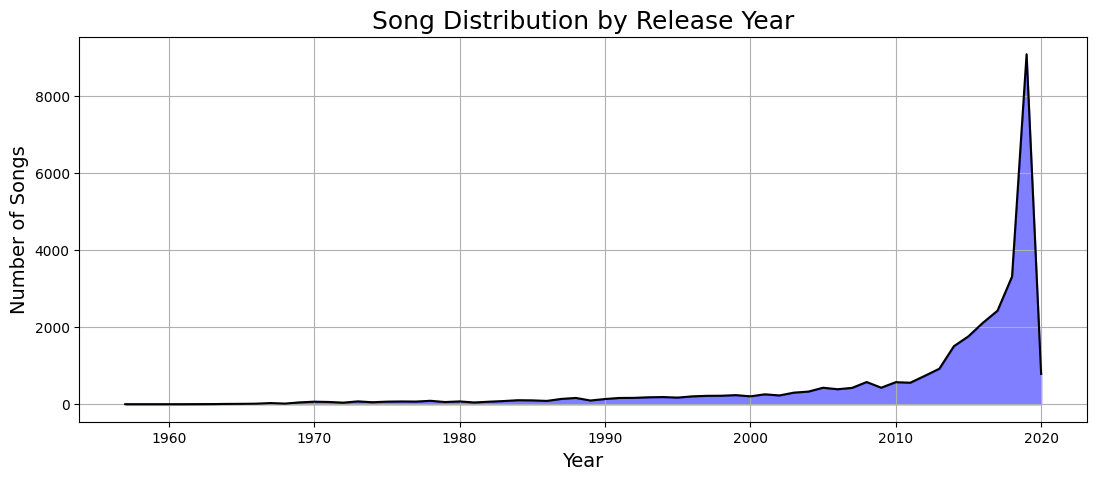

In [6]:
# Counting the number of songs released each year
yearly_tracks = data['year'].value_counts().sort_index()

plt.figure(figsize=(13, 5))
sns.lineplot(x=yearly_tracks.index, y=yearly_tracks.values, c = 'black')
plt.title('Song Distribution by Release Year', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Songs', fontsize = 14)

# Color coding different eras
plt.fill_between(yearly_tracks.index, yearly_tracks.values, color='blue', alpha=0.5)
plt.grid(True)
plt.show()


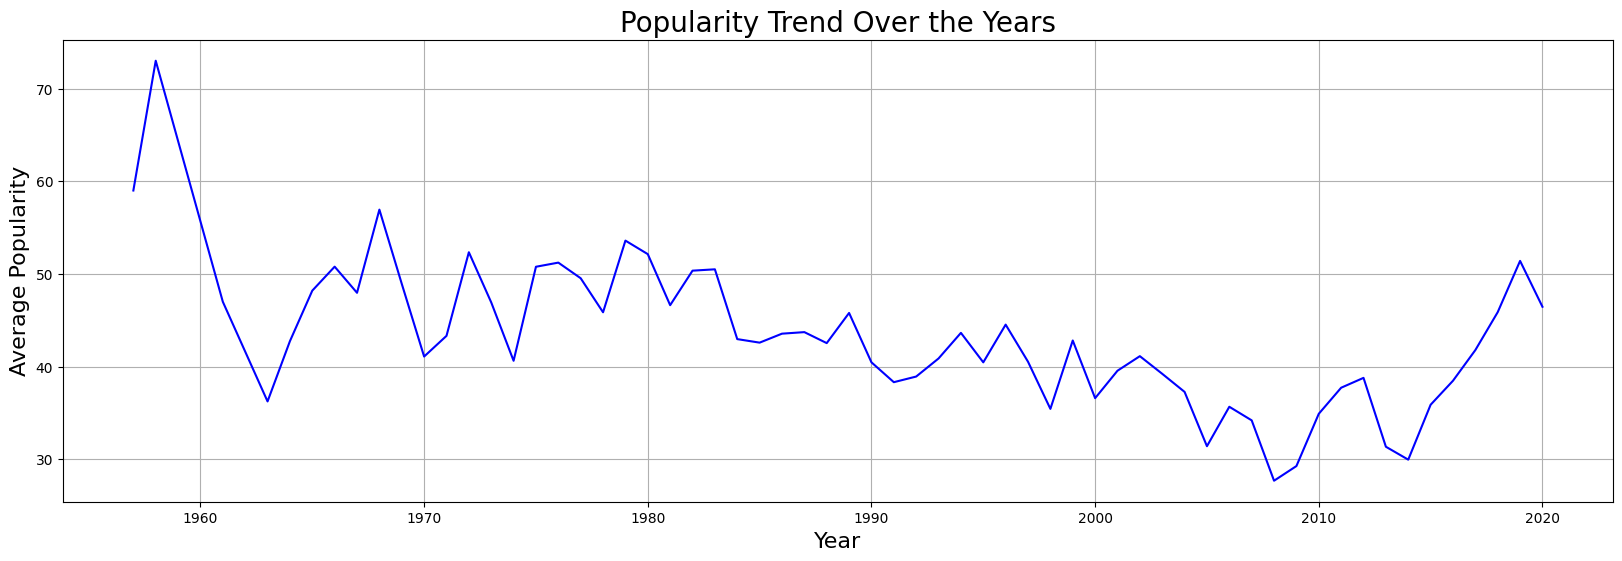

In [7]:
# Calculate the average popularity for each year
yearly_popularity = data.groupby('year')['track_popularity'].mean()

plt.figure(figsize=(20, 6))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, c = 'blue')
plt.title('Popularity Trend Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Popularity', fontsize=16)
plt.grid(True)
plt.show()

# **Recommendation Process** ....    (We are making use of interaction surrounding popularity)

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print(train_data.shape)
print(test_data.shape)

(26266, 24)
(6567, 24)


## Performing Matrix Interaction

### The interaction matrix is used by recommendation algorithms to predict which items (songs, movies, etc.) a user might like based on the interactions of other users with similar items. Makes use of pivot table

In [9]:
interaction_matrix = train_data.pivot_table(index='playlist_id', columns='track_name', values='track_popularity').fillna(0) 
interaction_matrix

track_name,"""I TRIED FOR YEARS... NOBODY LISTENED""","""This Is Seagull….""",#1 Stunna,#NAKAMA,#Natural,#Twerkit,#Vivalawldkdz (Roberto Rosso Remix) [feat. Twelve24],$$$ - Remix,$. A. N. T. E. R. Í. A.,$20 Fine,...,貴方しか見えない,霧のDOWN TOWN,달라달라 DALLA DALLA,불타오르네 FIRE,소방차 Fire Truck,숙녀 (淑女) Lady,쉼표,중독 Overdose,피카부 Peek-A-Boo,하드캐리 Hard Carry
playlist_id,,,,,,,,,,,,,,,,,,,,,
0275i1VNfBnsNbPl0QIBpG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03qQtbNHoJuFezRu2CnLuF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03sDEv7FN58Mb9CJOs1Tgn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06zrBJ5cts5aemZmqe80J7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07SNJ4MwYba9wwmzrbjmYi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7sq6nuruoMyDhEWkX2oYOg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7tkgK1tm9hYkWp7EFyOcAr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7vJOXFe40axY7qS39vGDyH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


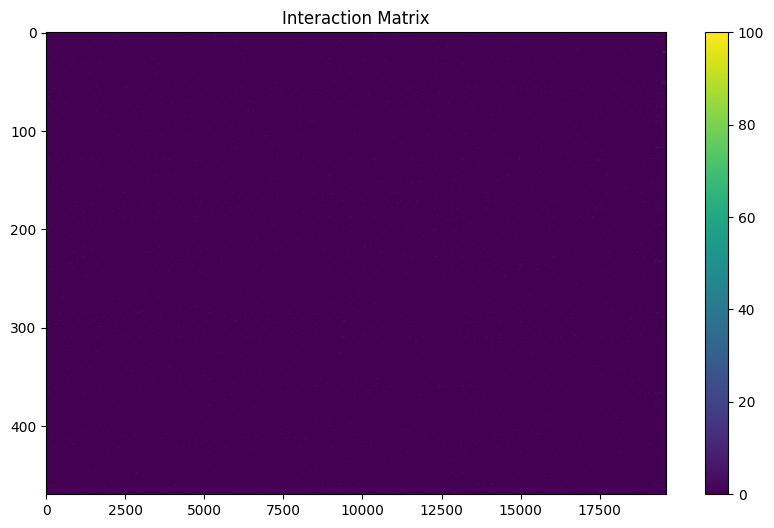

In [10]:
# Plotting the Interaction Matrix
plt.figure(figsize=(10, 6))
plt.imshow(interaction_matrix, aspect='auto', cmap='viridis')
plt.title('Interaction Matrix')
plt.colorbar()
plt.show()

## There is no relation at all with interactive_matrix(pivot table)...this is because, different users did not rate or score diffrent tracks ...for that reason, we will use their attributes for recommendation

# **Making Recommendation**

## We will make use of 'k means cluster' (supervised machine learning)

In [11]:
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019.0


In [12]:
# Selecting  the relevant features for clustering....the attributes columns
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

X = data[features]
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036
1,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972
2,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976
...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041
32830,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989
32831,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008


## We will apply **feature scaling** since the values in different columns are far apart from eachother

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Finding the optimal number of clusters using 'Elbow method'

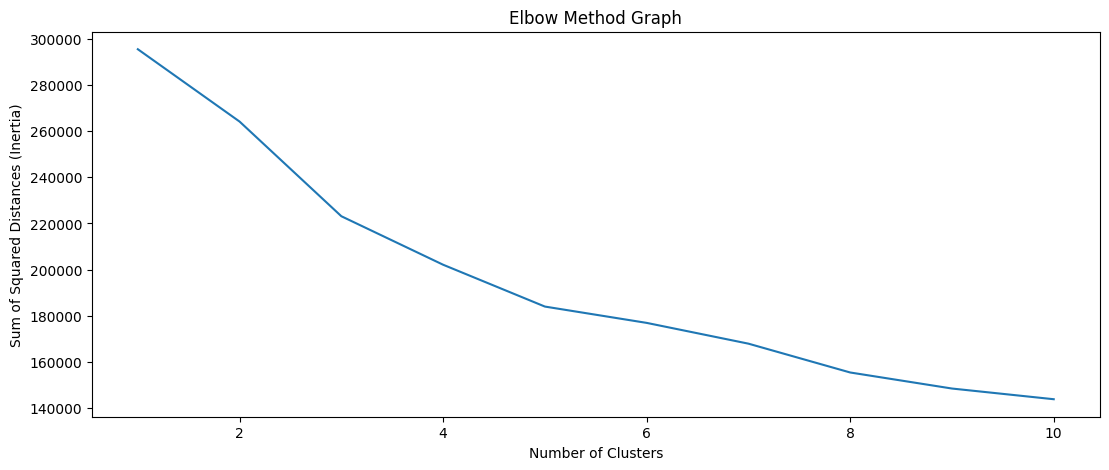

In [14]:
from sklearn.cluster import KMeans

wrkn_list = []
k_range = range(1, 11)
#Using loop, for interations from 1 to 10.
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wrkn_list.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize = (13,5))
plt.plot(k_range, wrkn_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method Graph')
plt.show()

# Since I didn't know the no of clusters to use, I referred to it as 'i' and carried out the elbow method from 1 to 10

### The optimal number of cluster is 5

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X)
kmeans

KMeans(n_clusters=5, random_state=42)

In [16]:
# For centroid values
centroid= kmeans.cluster_centers_
centroid

array([[-0.76850599,  0.56812023,  0.48448114, -0.32936673, -0.49605825,
        -0.26517032,  0.35599453, -0.53632137,  0.4053369 ],
       [ 0.56268617,  0.14439265,  0.17129451, -0.32230477, -0.16021235,
        -0.31233173, -0.22226795,  0.69156304, -0.24392604],
       [-0.36206094, -1.4872581 , -1.2427667 , -0.34134467,  1.52069016,
         0.01019422, -0.21821112, -0.51140616, -0.31214326],
       [ 0.04063724,  0.46755931, -0.0802876 , -0.34832608, -0.452024  ,
         2.95505549, -0.00298506, -0.5326395 ,  0.15599484],
       [ 0.47298476, -0.17244482, -0.03037665,  2.01880639,  0.0250782 ,
        -0.33283228,  0.0849031 ,  0.16326977,  0.05308539]])

In [17]:
# Viewing total cluster
data['cluster'].value_counts()

cluster
1    11606
0     9171
2     4894
4     4610
3     2552
Name: count, dtype: int64

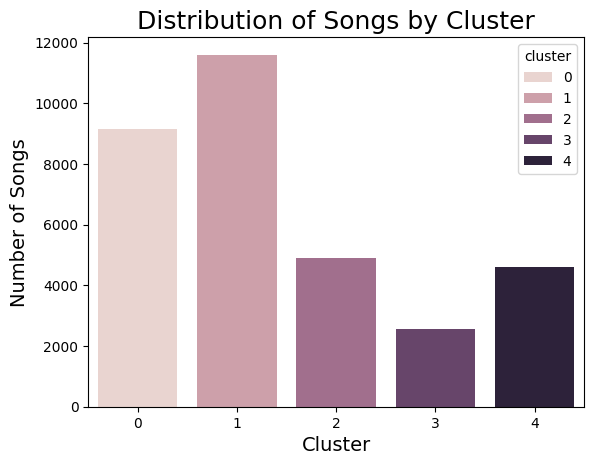

In [18]:
cluster = data['cluster'].value_counts()

sns.barplot(x=cluster.index, y=cluster.values, hue = cluster.index)
plt.xlabel('Cluster', fontsize = 14)
plt.ylabel('Number of Songs', fontsize = 14)
plt.title('Distribution of Songs by Cluster', fontsize = 18)
plt.show()


# **Applying PCA**

### PCA allows the recommendation system to work more effectively, making it faster and  more accurate. Best used when we have large number of features that we are comparing with

In [19]:
from sklearn.decomposition import PCA

# The PCA model specifying the number of components to reduce to (2 components).
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca         # We have reduced our data to two components (for accuracy purposes)

array([[ 1.53933735,  0.54789535],
       [ 1.07365772,  0.68692152],
       [ 1.61517919,  0.43387146],
       ...,
       [ 0.93496696, -0.80186852],
       [ 1.75253503, -0.84192664],
       [ 1.80167919, -2.40062104]])

In [20]:
# For PCA centroid values
centroid= kmeans.cluster_centers_
pca_centroid = pca.transform(centroid)       # To fit the x_pca values
pca_centroid

array([[ 0.98288174, -0.95166903],
       [ 0.25357119,  0.83363837],
       [-2.47870499, -0.54267716],
       [ 0.25082166, -1.36005047],
       [-0.09930027,  1.12147146]])

# Visulaizing the clusters  

In [21]:
grp = data['cluster']

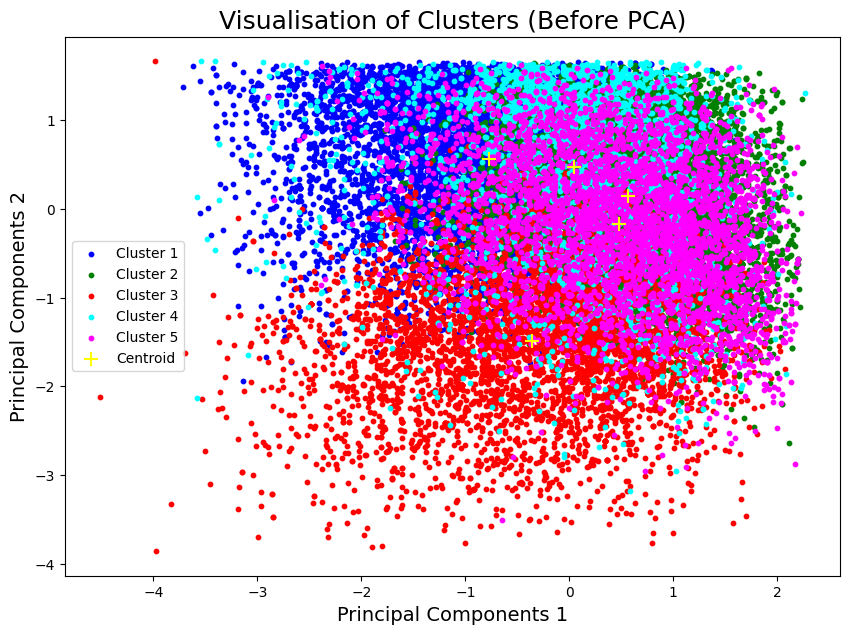

In [22]:
plt.figure(figsize = (10,7))
# "0,0" and "0,1" are positional agruments that must be inputed
plt.scatter(X[grp == 0, 0], X[grp == 0, 1], s = 10, c = 'blue', label = 'Cluster 1') #for first cluster, s means size
plt.scatter(X[grp == 1, 0], X[grp == 1, 1], s = 10, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[grp == 2, 0], X[grp == 2, 1], s = 10, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(X[grp == 3, 0], X[grp == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(X[grp == 4, 0], X[grp == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
# To get the 'Centroid' (the center of each cluster)
plt.scatter(centroid[:, 0], centroid[:, 1], s = 100, c = 'yellow', label = 'Centroid', marker = '+')
plt.title('Visualisation of Clusters (Before PCA)', fontsize = 18)  
plt.xlabel('Principal Components 1', fontsize= 14)  
plt.ylabel('Principal Components 2',fontsize = 14) 
plt.legend()
plt.show()

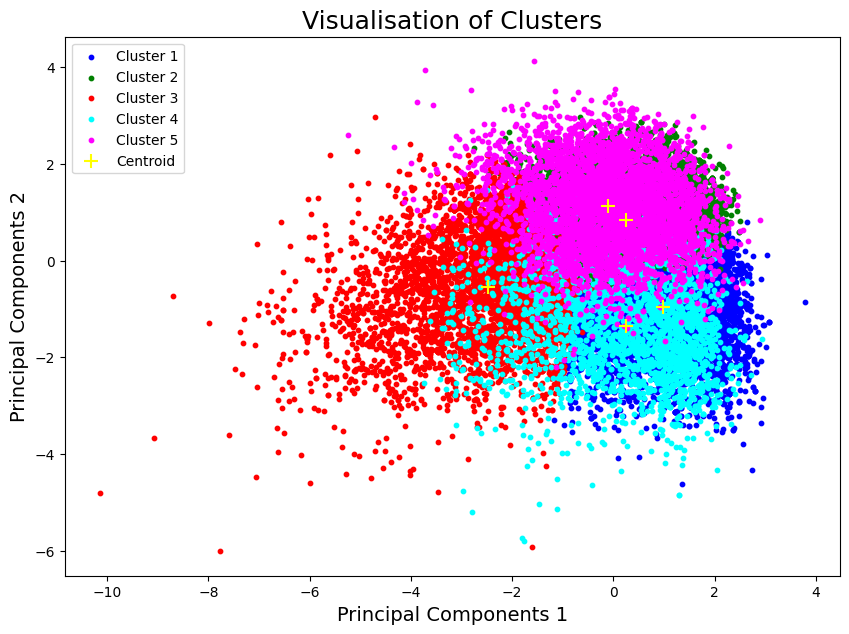

In [23]:
plt.figure(figsize = (10,7))
# "0,0" and "0,1" are positional agruments that must be inputed
plt.scatter(X_pca[grp == 0, 0], X_pca[grp == 0, 1], s = 10, c = 'blue', label = 'Cluster 1') #for first cluster, s means size
plt.scatter(X_pca[grp == 1, 0], X_pca[grp == 1, 1], s = 10, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X_pca[grp == 2, 0], X_pca[grp == 2, 1], s = 10, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(X_pca[grp == 3, 0], X_pca[grp == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(X_pca[grp == 4, 0], X_pca[grp == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
# To get the 'Centroid' (the center of each cluster)
plt.scatter(pca_centroid[:, 0], pca_centroid[:, 1], s = 100, c = 'yellow', label = 'Centroid', marker = '+')
plt.title('Visualisation of Clusters', fontsize = 18)  
plt.xlabel('Principal Components 1', fontsize= 14)  
plt.ylabel('Principal Components 2',fontsize = 14) 
plt.legend()
plt.show()

# Recommendation process

In [24]:
def recommend(song_name, data):
    # Search for the selected song in the dataset, ignoring case and handling missing values
    song = data[data['track_name'].str.contains(song_name, case=False, na=False)]
    # If the song is not found, display the message 
    if song.empty:
        print("Song not found.")
        return None
    # Get the cluster to which the song belongs
    cluster = song['cluster'].values[0]
    # Find all songs that belong to the same cluster as the selected song
    recommended_songs = data[data['cluster'] == cluster]
    # Exclude the selected song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_name'] != song['track_name'].values[0]]
    # Return the 'track_name','track_artist' and 'track_popularity' columns of the top 15 recommendations
    return recommended_songs[['track_name', 'track_artist', 'track_popularity']].head(15)

# The Recommendation process can be carried out for any Song in the dataset

In [25]:
# Example with 'Shape of You'
song_name = "Shape of You"  
top_recommendations = recommend(song_name, data)

# If recommendations are found, print them
if top_recommendations is not None:
    print("Recommended Tracks")
top_recommendations

Recommended Tracks


,track_name,track_artist,track_popularity
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66
1,Memories - Dillon Francis Remix,Maroon 5,67
2,All the Time - Don Diablo Remix,Zara Larsson,70
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69
5,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67
9,If I Can't Have You - Gryffin Remix,Shawn Mendes,67
10,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Ed Sheeran,58
12,Body On My,Loud Luxury,67
15,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,66
17,Say My Name (feat. Bebe Rexha & J Balvin) - Lu...,David Guetta,65
